In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('rank_salary.csv')

## Check Data

In [3]:
df

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


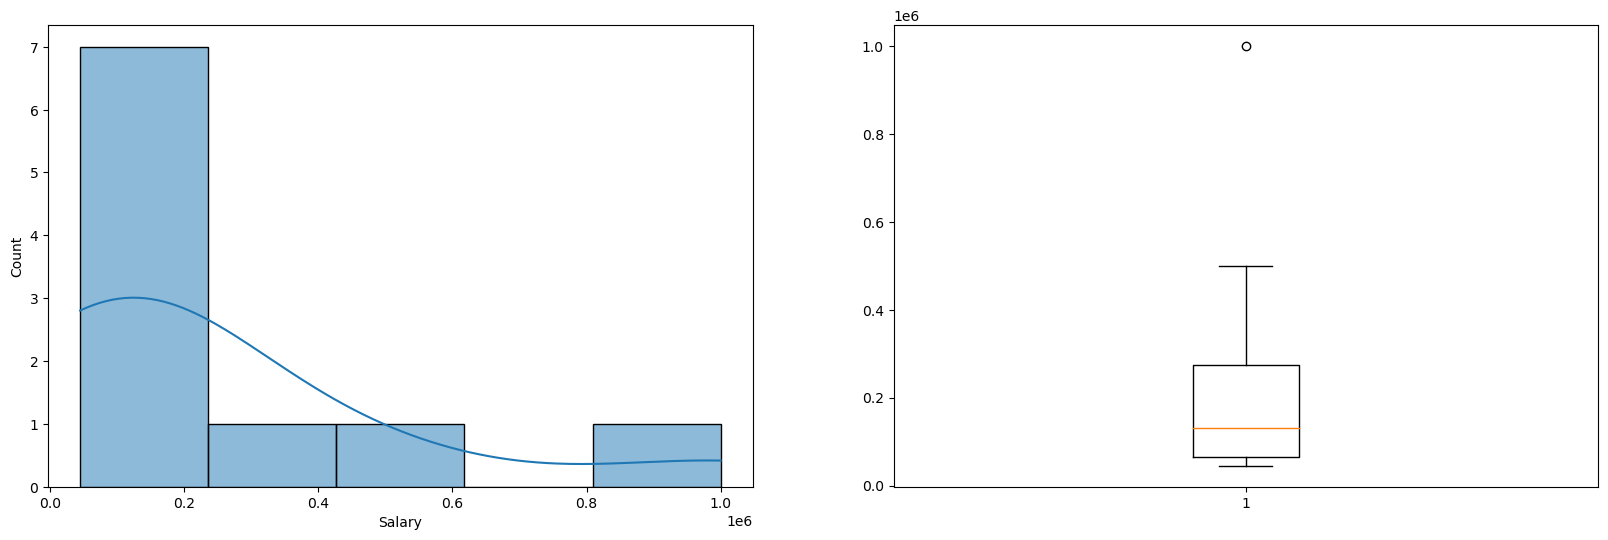

Income Skew: 2.1046045743695876


In [6]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(data=df,x='Salary',kde=True,ax=axs[0])
axs[1].boxplot(data=df,x='Salary')
plt.show()

print('Income Skew:',df['Salary'].skew())


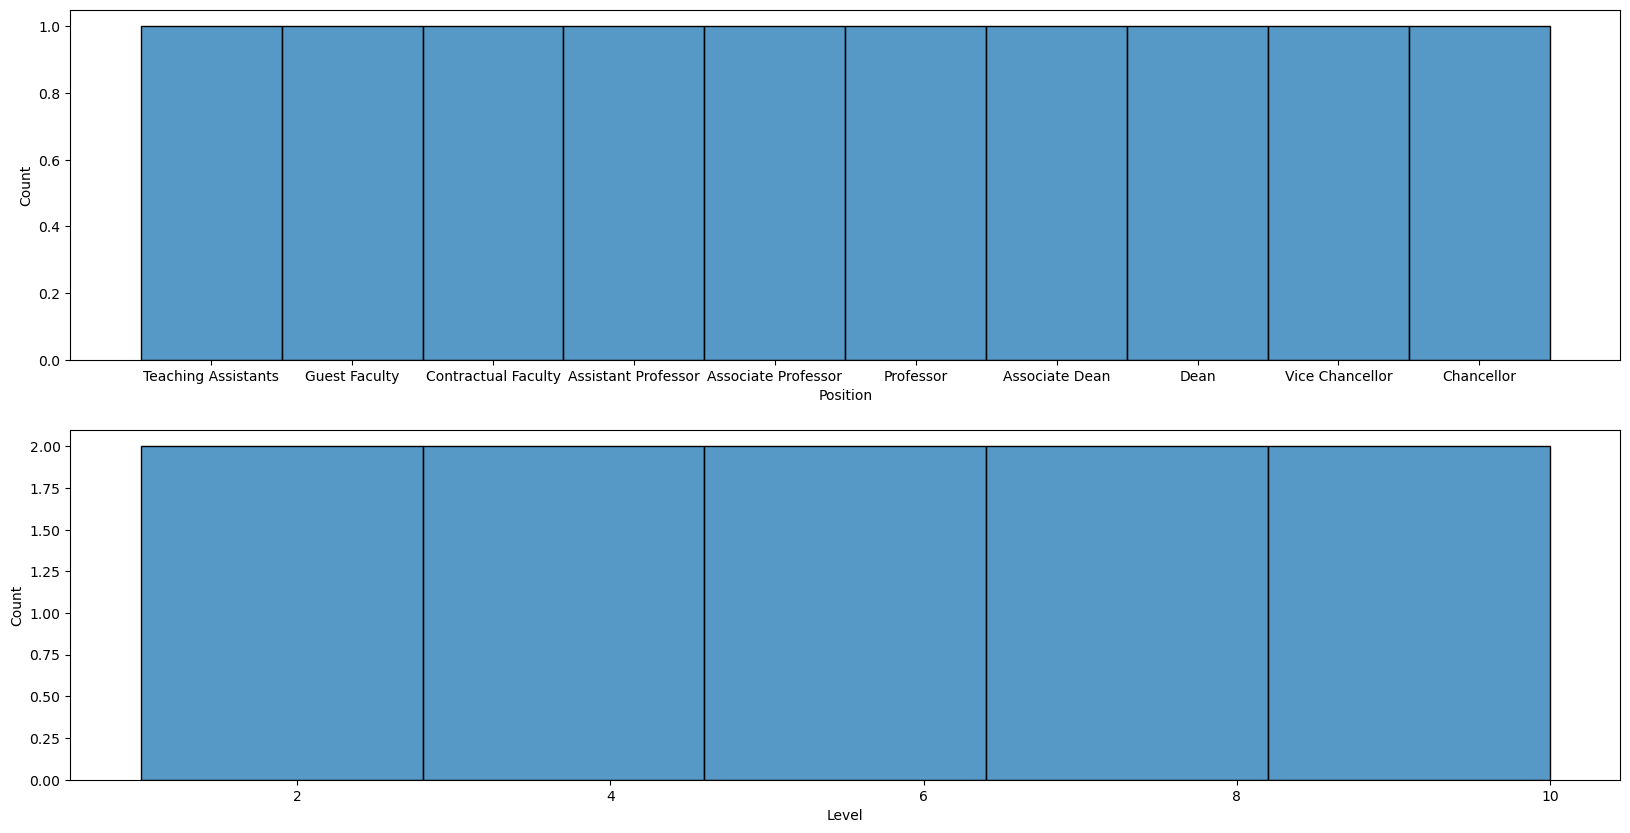

Level Skew: 0.0


In [7]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
sns.histplot(data=df,x='Position',ax=axs[0])
sns.histplot(data=df,x='Level',ax=axs[1])
plt.show()

print('Level Skew:',df['Level'].skew())

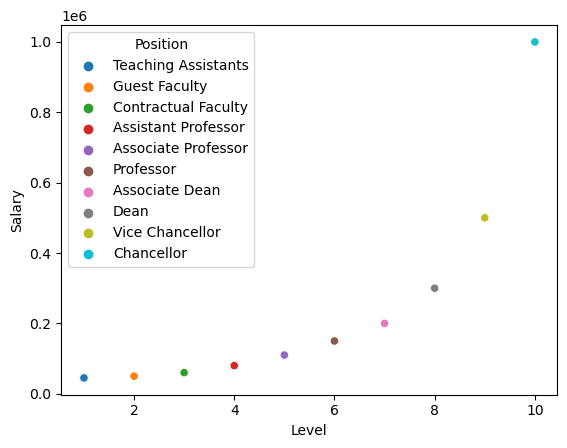

In [8]:
sns.scatterplot(x='Level',y='Salary',data=df,hue='Position')
plt.show()

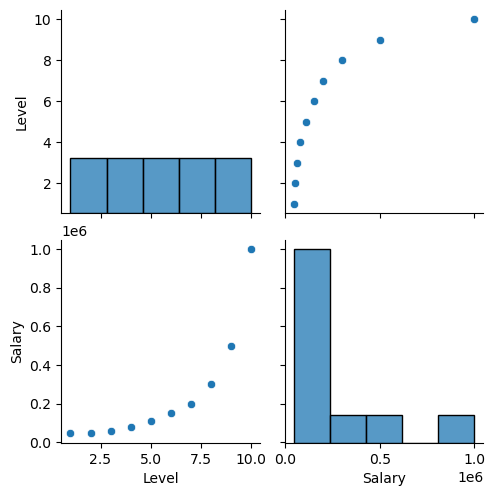

In [9]:
sns.pairplot(data=df)
plt.show()

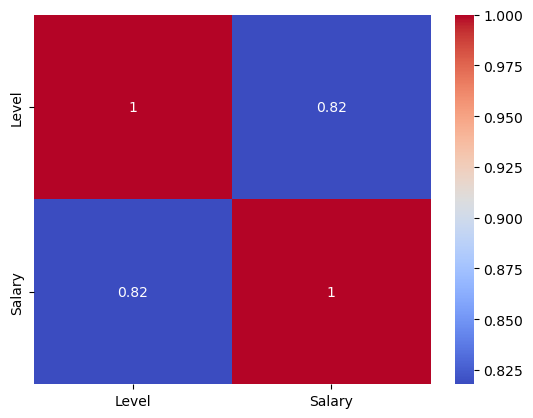

In [10]:
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.show()

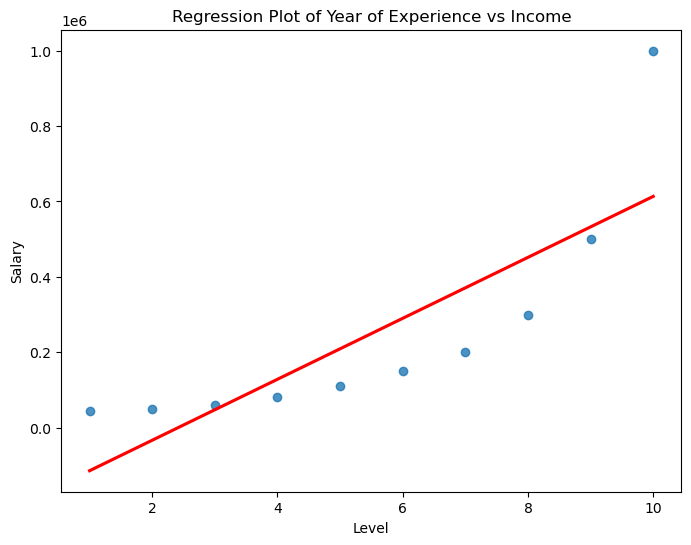

In [11]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Level', y='Salary', data=df, ci=None, line_kws={"color": "red"})
plt.title('Regression Plot of Year of Experience vs Income')
plt.show()

## Insights

●There is a strong positive relation between Level and Salary

●Inrease of position Increase In level and salary

## Modeling

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Position'] = label_encoder.fit_transform(df['Position'])
df['Position']

0    8
1    6
2    4
3    0
4    2
5    7
6    1
7    5
8    9
9    3
Name: Position, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
X = df[['Position','Level']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
degrees = range(1, 11)  # Testing polynomial degrees from 1 to 10
r2_scores, mse_scores, mae_scores = [], [], []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store metrics
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)


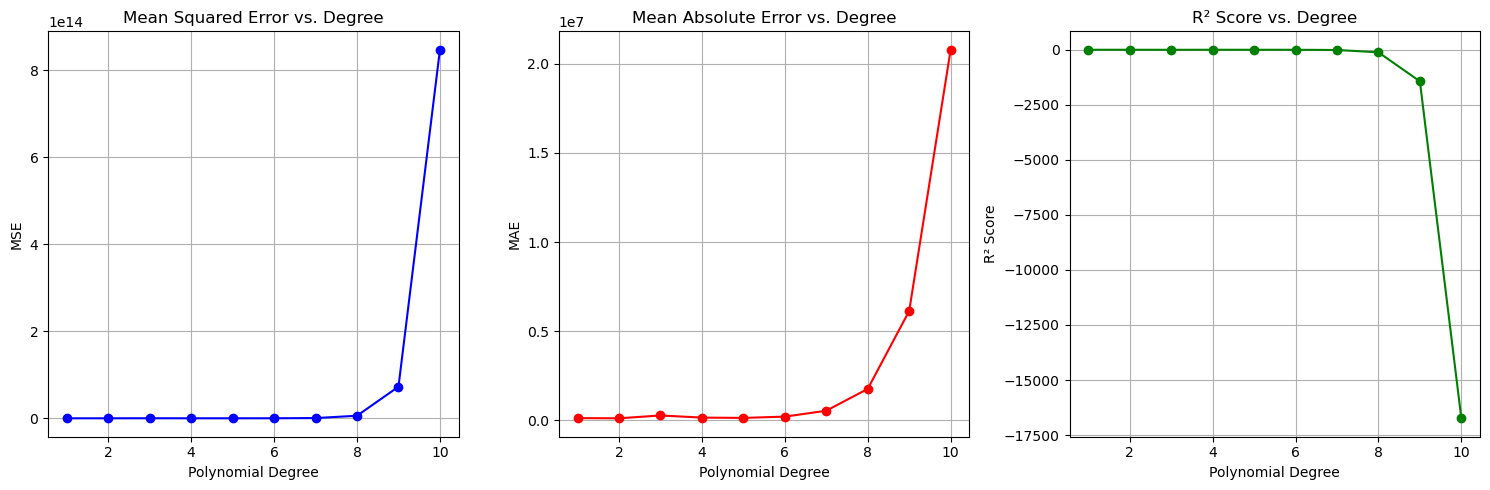

In [16]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(degrees, mse_scores, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error vs. Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(degrees, mae_scores, marker='o', linestyle='-', color='r')
plt.title('Mean Absolute Error vs. Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MAE')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(degrees, r2_scores, marker='o', linestyle='-', color='g')
plt.title('R² Score vs. Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
best_degree_index =np.argmax(r2_scores)  
best_degree = degrees[best_degree_index]

final=[]
final.append({
        "MAE":mae_scores[best_degree_index],
        "MSE":mse_scores[best_degree_index],
        "R² Score": r2_scores[best_degree_index],
        "Best polynomial degree": best_degree,

    })

finalresult = pd.DataFrame(final)
finalresult

,MAE,MSE,R² Score,Best polynomial degree
0,115544.422882,1.368252e+10,0.729728,1


## Summary

In summary, a polynomial degree of 1 with an R² score of 0.7 means that a linear model is effective for this data, explaining 70% of the variability in salary based on the given features.